## Финальный проект

В нашем распоряжении данные о клиентах банка «Метанпром», который располагается в Ярославле и областных городах: Ростове Великом и Рыбинске.

**Цель исследования** - проанализировать клиентов банка и выделить сегменты, склонные к уходу, чтобы разработать стратегии их удержания.

**Ход работы:**

- [1. Обзор данных](#Обзор_данных)
- [2. Предобработка данных](#Предобработка_данных)
  - [приведем названия колонок к нижнему регистру](#названия_колонок)
  - [исследуем пропущенные значения в колонке 'balance'](#balance)
  - [приведем колонку с полом к бинарному виду](#бинарному)
  - [разделим клиентов по возрастным категориям](#возрасту)
- [3. Исследовательский анализ данных](#анализ_данных)
  - [анализ общего оттока клиентов](#клиентов_ушло)
  - [распределение оттока по городам](#по_городам)
  - [сравнение признаков ушедших и оставшихся клиентов](#разрезе_тех)
  - [матрица корреляции](#матрицу)
  - [сегментация по количеству продуктов](#количеству_продуктов)
  - [распределение признаков в сегментах](#распределение_признаков)
  - [группы клиентов с высоким риском оттока](#наиболее_склонных)
  - [лояльные группы клиентов](#наиболее_лояльных)
- [4. Проверка гипотез](#Проверка_гипотез)
- [5. Вывод](#Вывод)



<a name="Обзор_данных"></a>
# 1. Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median, mean
import plotly.express as px
sns.set_palette('coolwarm')
from scipy import stats as st
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv('bank_scrooge.csv')

except:
    data = pd.read_csv(path)

In [4]:
data.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
data.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

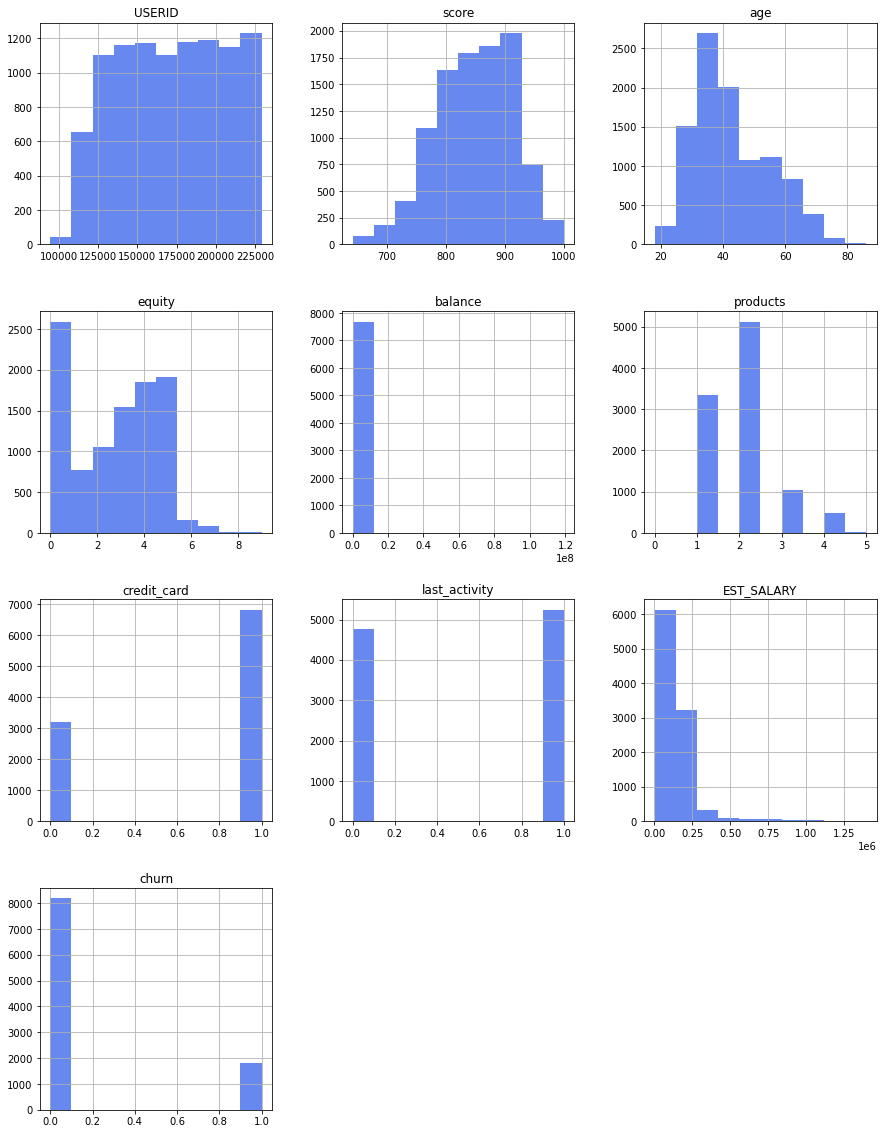

In [7]:
data.hist(figsize=(15, 20));

- в датасете содержится 10000 записей;
- есть пропуске в поле 'balance', необходимо изучить;
- необходимо привести название колонок к нижнему регистртру;
- привести столбец gender к бинарному виду;
- создать новый столбец с делением возраста на категории.

<a name="Предобработка_данных"></a>

## 2. Предобработка данных

<a name="названия_колонок"></a>
**Приведем название колонок к нижнему регистру и переименуем их**

In [8]:
data.columns = [x.lower() for x in data.columns]

data = data.rename(columns={'userid' : 'user_id'})

data.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

In [9]:
data = data[data['products'] > 0]

<a name="дубликаты"></a>
**Удалим дубликаты**

In [10]:
print( 'Число дубликатов:', data.duplicated(subset=['user_id', 'age', 'gender']).sum())

data = data.drop_duplicates(subset=['user_id', 'age', 'gender']).reset_index(drop=True)

Число дубликатов: 2


<a name="balance"></a>
**Исследуем пропущенные значения в колонке 'balance'**

In [11]:
data1 = data[data['balance'].isna()]

data1.describe()

user_id        score          age       equity  balance  \
count    2293.000000  2293.000000  2277.000000  2293.000000      0.0   
mean   172087.126472   865.284780    42.082126     0.049717      NaN   
std     33346.041534    89.611326    11.919023     0.217406      NaN   
min    114182.000000   642.000000    18.000000     0.000000      NaN   
25%    143088.000000   871.000000    33.000000     0.000000      NaN   
50%    172768.000000   903.000000    40.000000     0.000000      NaN   
75%    201557.000000   922.000000    49.000000     0.000000      NaN   
max    229145.000000   990.000000    86.000000     1.000000      NaN   

          products  credit_card  last_activity    est_salary        churn  
count  2293.000000  2293.000000    2293.000000  2.293000e+03  2293.000000  
mean      1.162669     0.815962       0.549498  2.264442e+05     0.005233  
std       0.401961     0.387600       0.497652  1.998024e+05     0.072168  
min       1.000000     0.000000       0.000000  2.027403e+04     0.000000  
25%       1.000000     1.000000       0.000000  1.204764e+05     0.000000  
50%       1.000000     1.000000       1.000000  1.742449e+05     0.000000  
75%       1.000000     1.000000       1.000000  2.401261e+05     0.000000  
max       3.000000     1.000000       1.000000  1.333687e+06     1.000000

Процент клиентов закрывших счета: 0.005233318796336677
Процент клиентов с кредитными картами: 0.8159616223288269


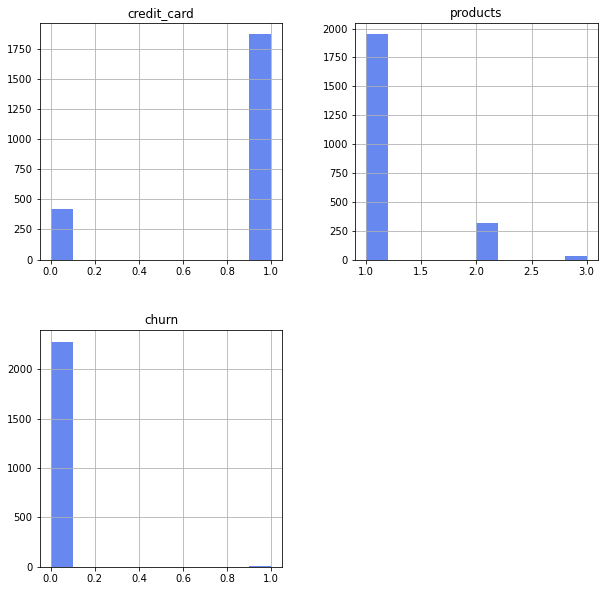

In [12]:
print('Процент клиентов закрывших счета:' , data1['churn'].mean())
print('Процент клиентов с кредитными картами:' , data1['credit_card'].mean())
data1[['credit_card', 'products', 'churn']].hist(figsize=(10, 10));

Большая часть пользователей с пропущенным значением - владельцы кредитных карт также видим, что только 5% клиентов закрыли счета. 

Можем предположить, что клиенты, у которых пропуски в 'balance' - это клиенты с отрицательным балансом из-за активных кредитных продуктов (КК, КН, овердрафт и т.д.).

<a name="бинарному"></a>
***Преведем колонку с полом к бинарному виду***

In [13]:
data = pd.get_dummies (data, columns=['gender'], drop_first= True )

<a name="возрасту"></a>
***Разделим клиентов на категории по возрасту***

In [14]:
age_labels = ['до 25', '25 - 39', '40 - 60', 'от 60']
cut_bins = [data.age.min(), 24, 39, 60, data.age.max()]

data['age_range'] = pd.cut(data['age'],
bins=cut_bins,
labels=age_labels)

<a name="анализ_данных"></a>
## 3. Исследовательский анализ данных

<a name="клиентов_ушло"></a>
**Посмотрим сколько всего клиентов ушло**

In [15]:
data['churn'].value_counts()

0    8178
1    1819
Name: churn, dtype: int64

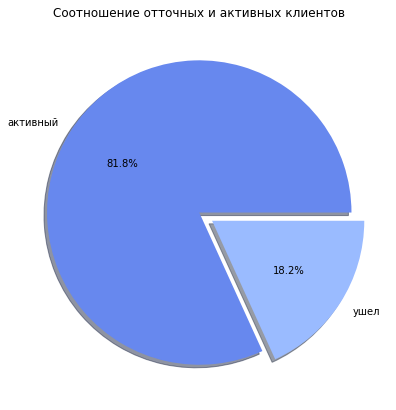

In [16]:
fig = plt.subplots(figsize=(18, 7))

plt.pie(data['churn'].value_counts(),
        labels = ['активный' , 'ушел'], 
        autopct='%1.1f%%',
        shadow=True,
        explode = (0, 0.1))

plt.title('Соотношение отточных и активных клиентов');

Отток составляет 18.3%

<a name="по_городам"></a>
**Посмотрим на общий отток по городам**

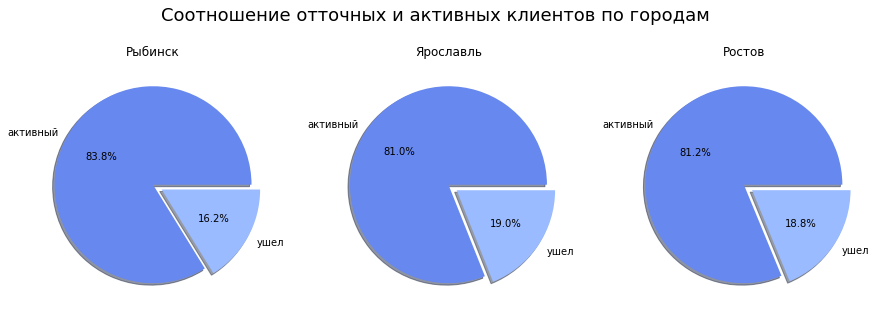

In [17]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,10))

ax1.pie(data[data['city'] =='Рыбинск']['churn'].value_counts(), labels = ['активный' , 'ушел'],autopct = '%1.1f%%', shadow=True, 
        explode = (0, 0.1))
ax1.set(title = 'Рыбинск')

ax2.pie(data[data['city'] =='Ярославль']['churn'].value_counts(), labels = ['активный' , 'ушел'],autopct = '%1.1f%%', shadow=True, 
        explode = (0, 0.1))
ax2.set(title = 'Ярославль')

ax3.pie(data[data['city'] =='Ростов']['churn'].value_counts(), labels = ['активный' , 'ушел'],autopct = '%1.1f%%', shadow=True, 
        explode = (0, 0.1))
ax3.set(title = 'Ростов')
fig.suptitle('Соотношение отточных и активных клиентов по городам', y=0.75, fontsize=18)

fig.show()

<a name="разрезе_тех"></a>
**Посмотрим на распределение признаков в разрезе тех кто ушел и кто остался**

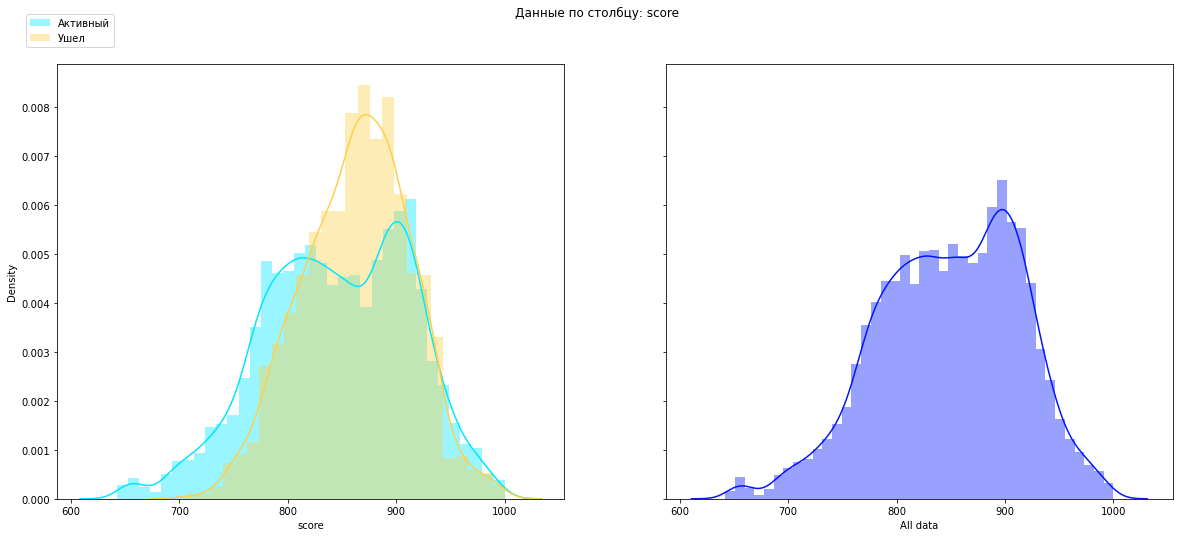

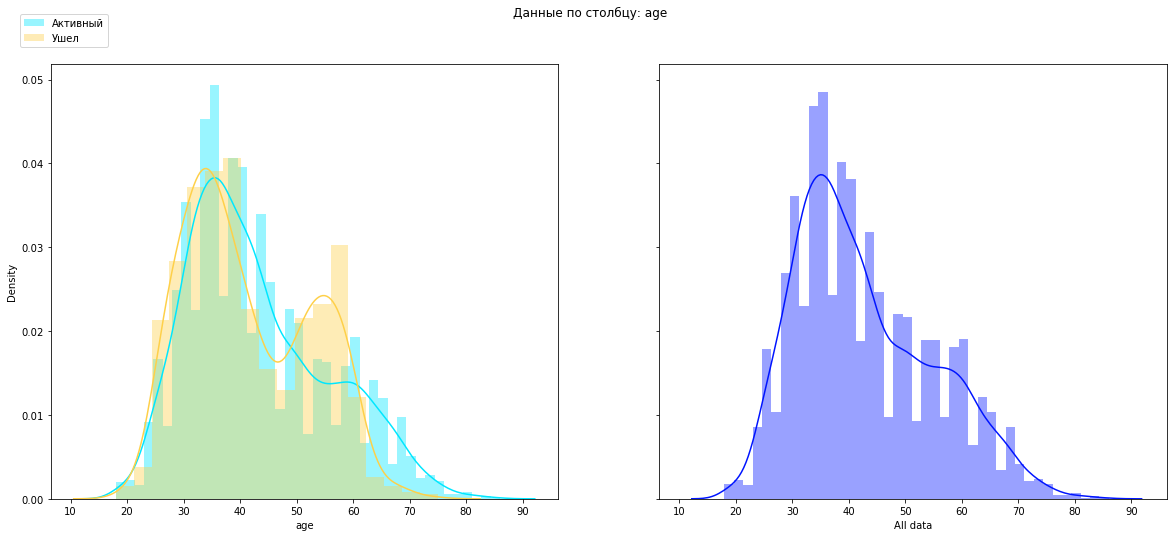

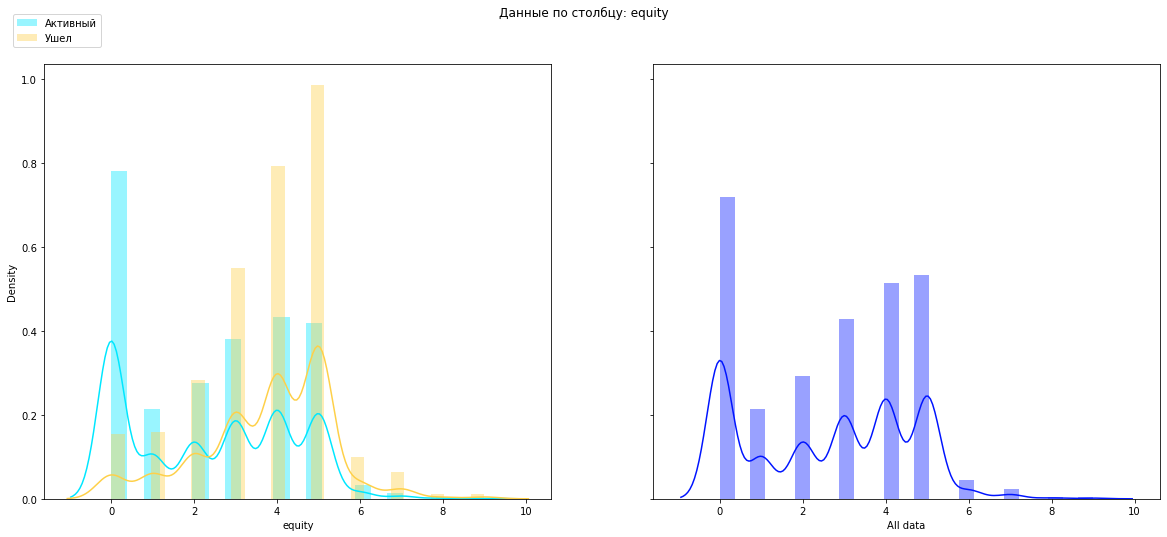

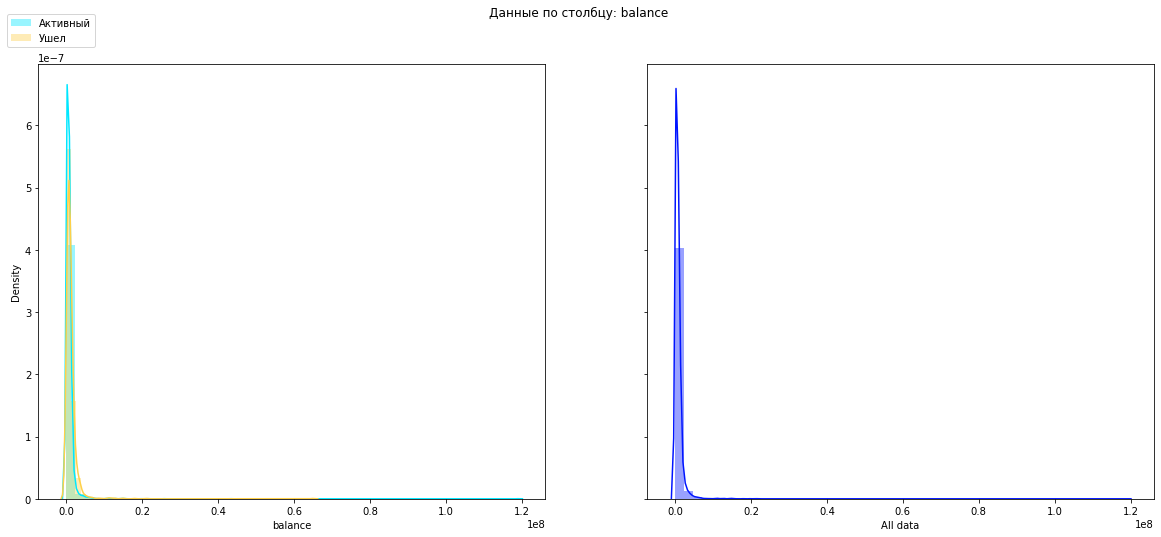

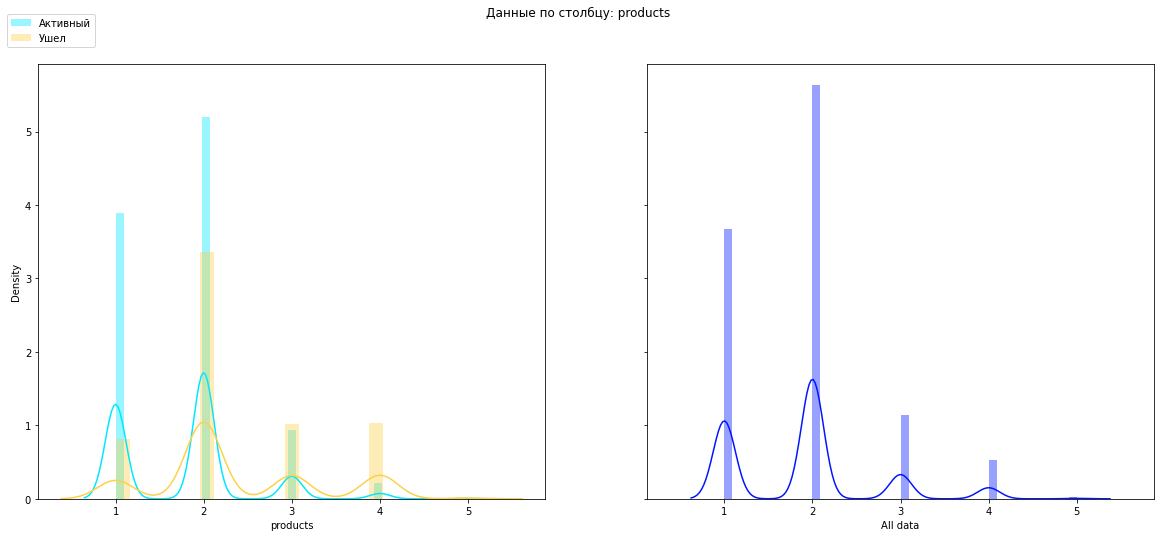

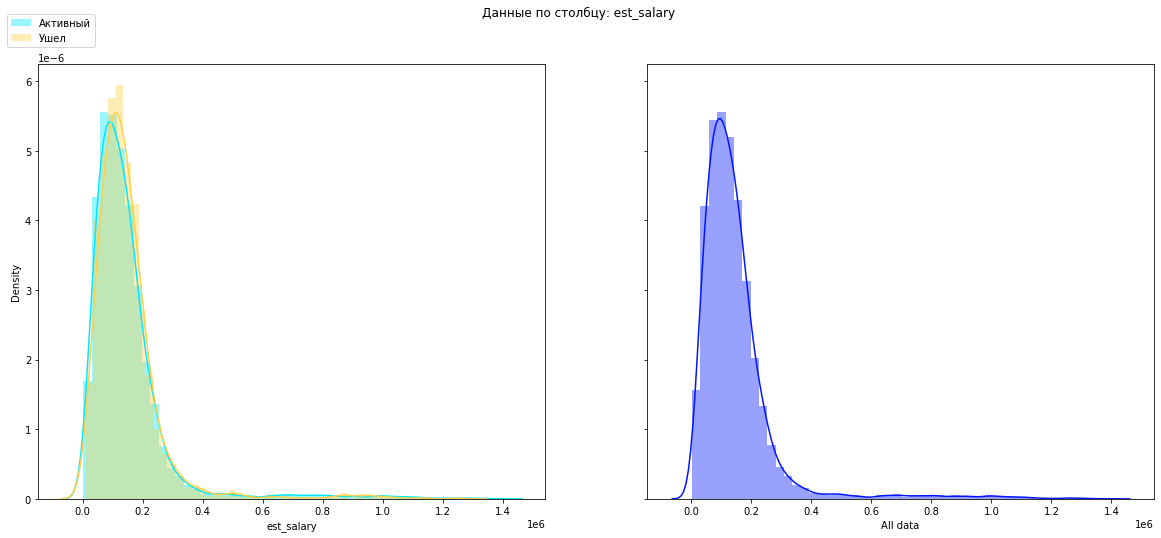

In [18]:
for i in data.drop(['churn', 'user_id', 'city', 'age_range', 'last_activity', 'credit_card', 'gender_М'], axis=1).columns.tolist():
    churn0 = data[data['churn'] == 0][i]
    churn1 = data[data['churn'] == 1][i]
    churn2 = data[i]
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True, sharex=True)
    fig.suptitle('Данные по столбцу: ' + i)
    sns.distplot(churn0 , color="#00E7FF", ax=axes[0], label='Активный')
    sns.distplot(churn1 , color="#FED049", ax=axes[0], label='Ушел')
    sns.distplot(churn2 , color="#0014FF", ax=axes[1], axlabel='All data', hist=True)
    fig.legend(bbox_to_anchor=(0.1, 0.9), loc='lower left')

    plt.show()

In [19]:
#обернем построение диаграмы в функцию

def Dpie (column, subtitle, labels):
    fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,10))

    ax1.pie(data[data['churn'] ==0][column].value_counts(sort = False), labels = labels ,autopct = '%1.1f%%', shadow=True, 
        explode = (0, 0.1))
    ax1.set(title = 'не в оттоке')

    ax2.pie(data[data['churn'] !=0][column].value_counts(sort = False), labels = labels,autopct = '%1.1f%%', shadow=True, 
        explode = (0, 0.1))
    ax2.set(title = 'в оттоке')

    ax3.pie(data[column].value_counts(sort = False), labels = labels,autopct = '%1.1f%%', shadow=True, 
        explode = (0, 0.1))
    ax3.set(title = 'all data')

    fig.suptitle(subtitle, y=0.75, fontsize=18)

    fig.show()

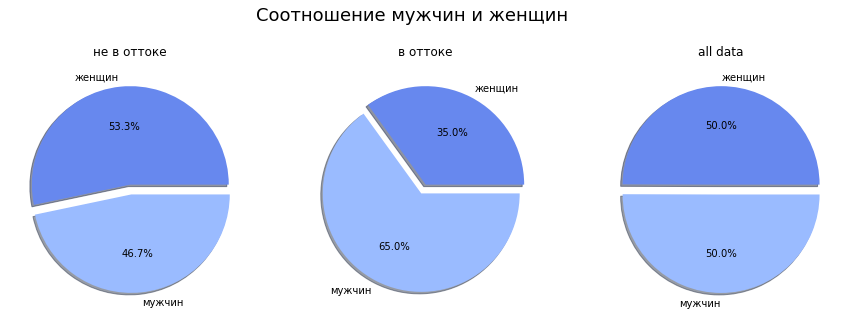

In [20]:
labels =  ['женщин', 'мужчин']
Dpie('gender_М', 'Соотношение мужчин и женщин', labels)

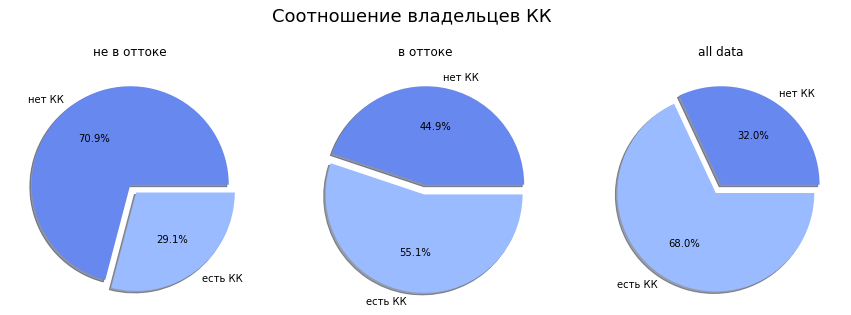

In [21]:
labels =  ['нет КК', 'есть КК']
Dpie('credit_card', 'Соотношение владельцев КК', labels)

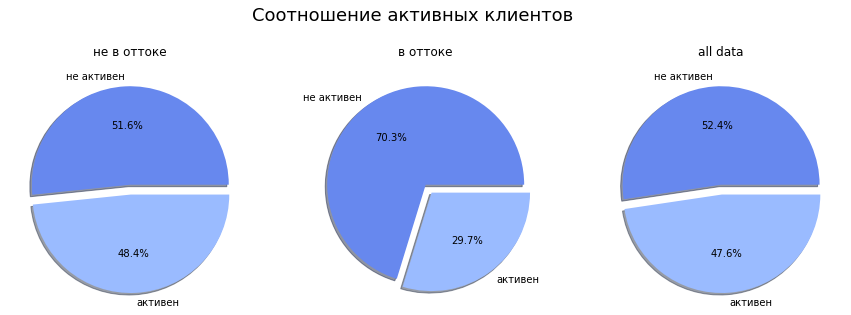

In [22]:
labels =  ['не активен', 'активен']
Dpie('last_activity', 'Соотношение активных клиентов', labels)

Посмотрим средние значения в разрезе тех кто остался и ушёл

In [23]:
data.groupby(['churn']).mean()

user_id       score        age    equity       balance  products  \
churn                                                                           
0      171999.522744  845.419663  43.023550  2.375153  7.340517e+05  1.757642   
1      170975.058824  863.346894  41.429593  3.764156  1.133993e+06  2.377130   

       credit_card  last_activity     est_salary  gender_М  
churn                                                       
0         0.709098       0.483737  147791.998699  0.467107  
1         0.551402       0.702584  148310.728202  0.650357

По графикам мы видим, что наиболее склонные к оттоку клиенты:
- в возрасте 45-60 лет;
- с кол-вом обьектов недвижимости 3 и более;
- с числом продуктов 3 и более;
- активные клиенты (возможно, если клиент обращается в банк для закрытия счета - это учитывается как активность);
- мужского пола.

<a name="матрицу"></a>
***Построим матрицу корреляции***

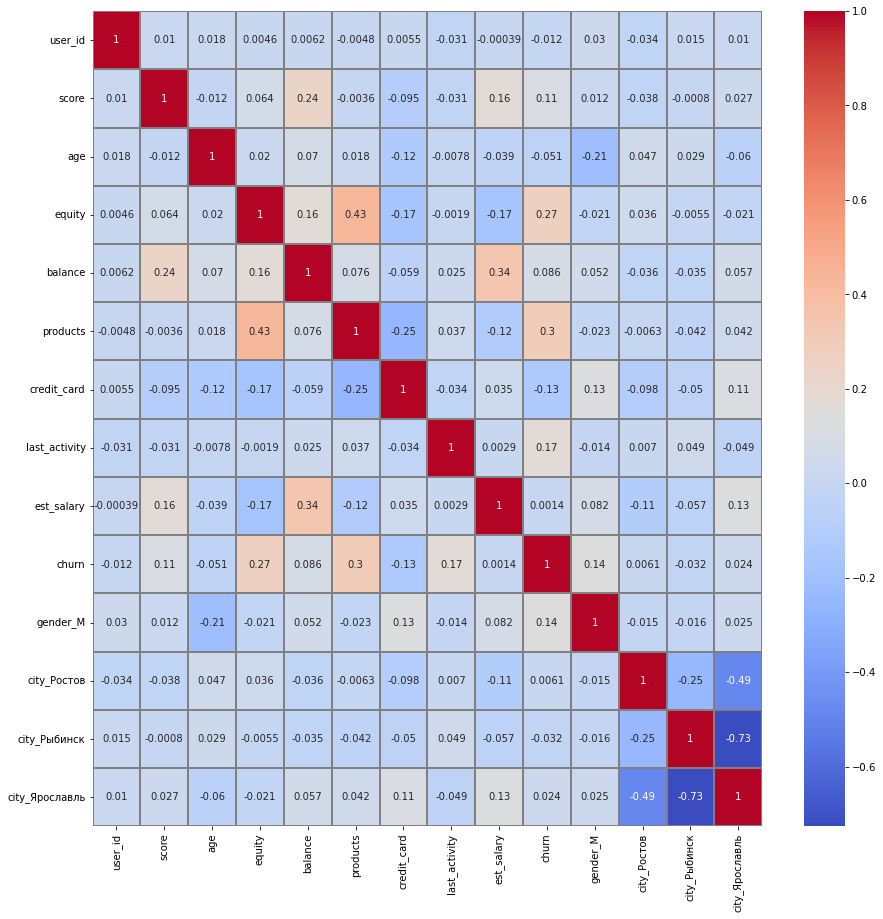

In [24]:
cm = pd.get_dummies (data, columns=['city'], drop_first= False ).corr() 

plt.figure(figsize=(15,15))

sns.heatmap(cm, annot=True,linewidth = 0.4, linecolor = 'gray',cmap='coolwarm')

plt.show()

Умеренно положительную корреляционную связь показывают:
- кол-во обьектов недвижимости и кол-во продуктов - 0.43;
- размер зп и баланс на счете - 0.34;
- кол-во продуктов и отток - 0.3.
В целом, признаки показывают слабую корреляционную связь

In [25]:
data.head()

user_id  score       city   age  equity     balance  products  credit_card  \
0   183012  850.0    Рыбинск  25.0       1    59214.82         2            0   
1   146556  861.0    Рыбинск  37.0       5   850594.33         3            1   
2   120722  892.0    Рыбинск  30.0       0         NaN         1            1   
3   225363  866.0  Ярославль  51.0       5  1524746.26         2            0   
4   157978  730.0  Ярославль  34.0       5      174.00         1            1   

   last_activity  est_salary  churn  gender_М age_range  
0              1    75719.14      1         0   25 - 39  
1              0    86621.77      0         0   25 - 39  
2              1   107683.34      0         0   25 - 39  
3              1   174423.53      1         0   40 - 60  
4              0    67353.16      1         1   25 - 39

<a name="количеству_продуктов"></a>
***Сегментация клиентов по количеству продуктов***

In [26]:
data['products'].value_counts()

2    5125
1    3340
3    1039
4     474
5      19
Name: products, dtype: int64

группа с 5 продуктами малочисленна, разделим клиентов на 4 сегмента

In [27]:
data['segments'] = data['products'].replace(5, 4)
data['segments'].value_counts()

2    5125
1    3340
3    1039
4     493
Name: segments, dtype: int64

In [28]:
segment_churn =  data.pivot_table(index= 'segments',
                 values= 'churn')

segment_churn['остался'] = round((1 - segment_churn['churn']) * 100)
segment_churn['ушел'] = round(segment_churn['churn'] * 100)

segment_churn.columns

Index(['churn', 'остался', 'ушел'], dtype='object')

In [29]:
fig = px.bar(segment_churn, 
       y=['остался', 'ушел'], 
       x=segment_churn.index, 
       text_auto= True,
       color_discrete_sequence=px.colors.sequential.Pinkyl,
            title= 'Соотношение оттока клиента в разрезе сегментов')


fig.update_xaxes(title_text='Сегмент')
fig.update_yaxes(title_text='%')

fig.show() 

Самыми надежными являются сегменты 1 и 2, вероятность ухода 7 и 19% соответсвенно. 
В 4-м сегоменте шанс, что клиент покинет банк составляет 61%.


<a name="распределение_признаков"></a>
**Посмотрим распределение признаков в разрезе сегментов**

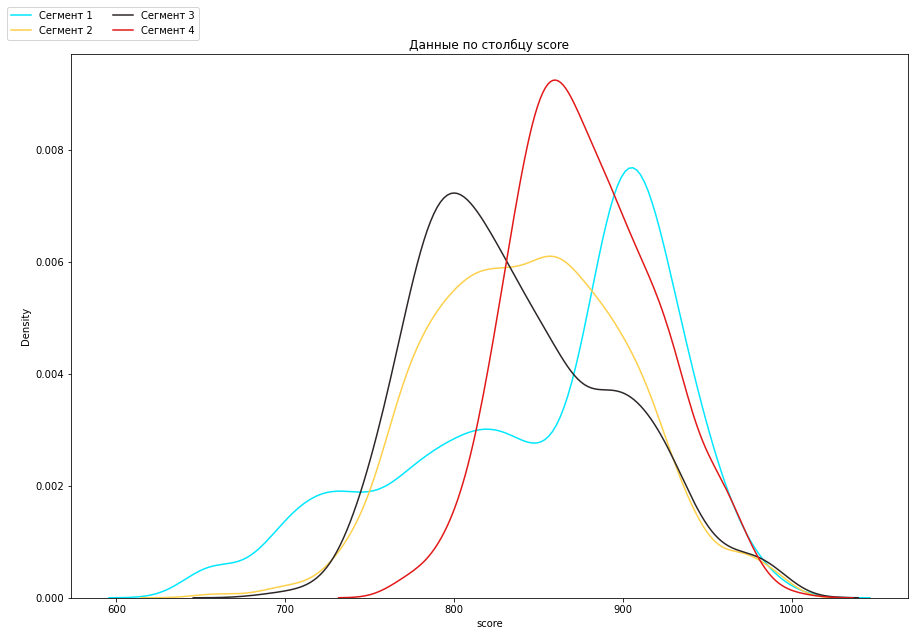

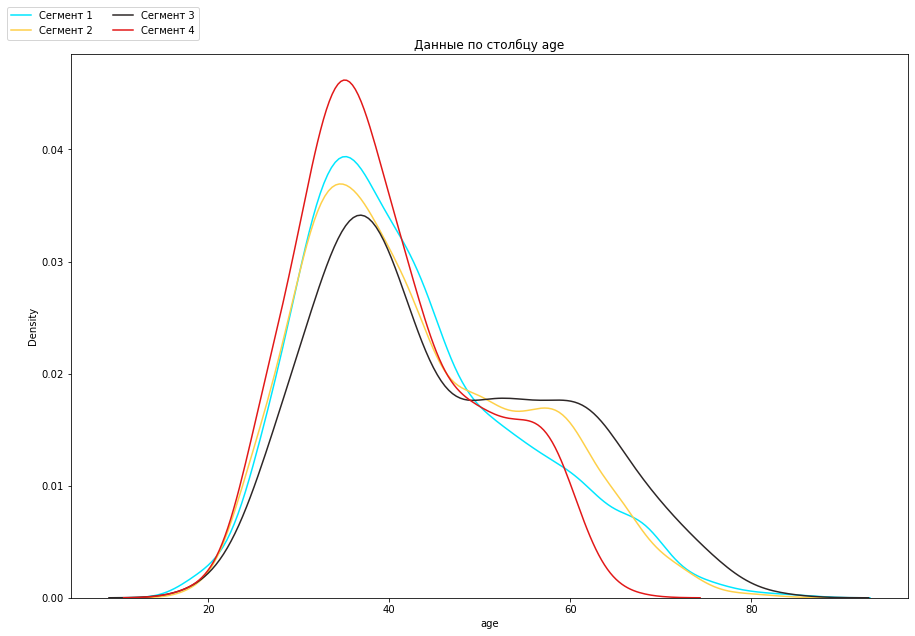

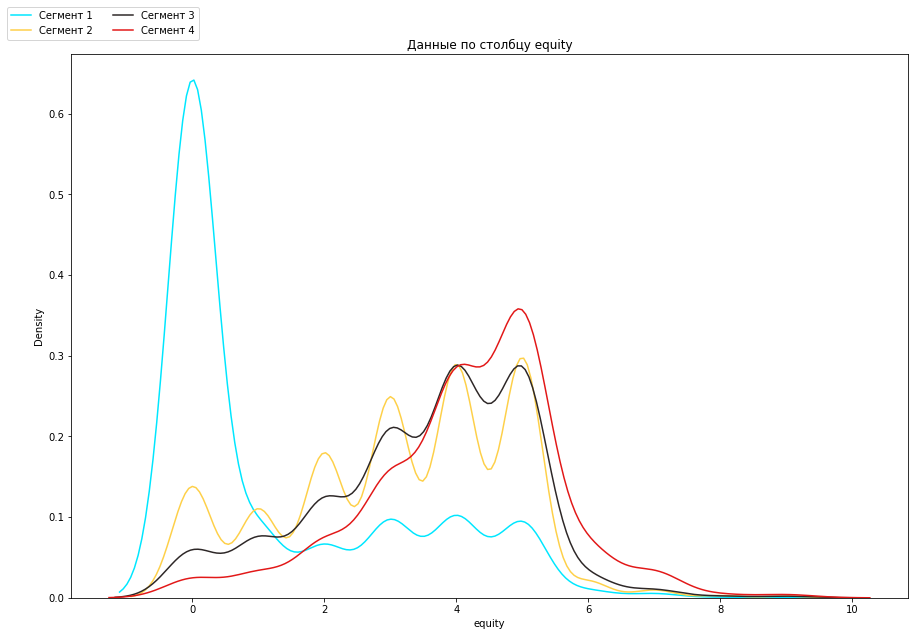

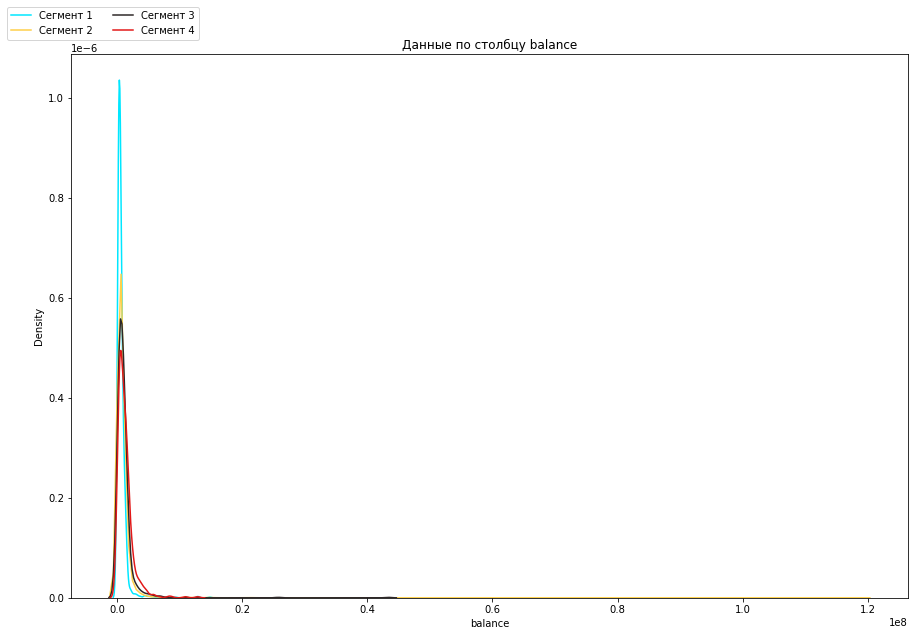

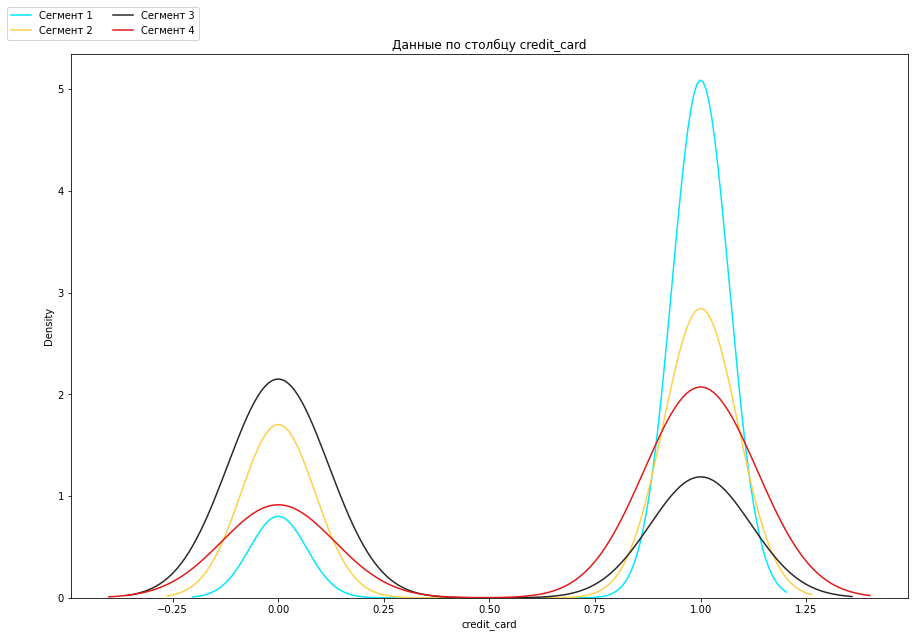

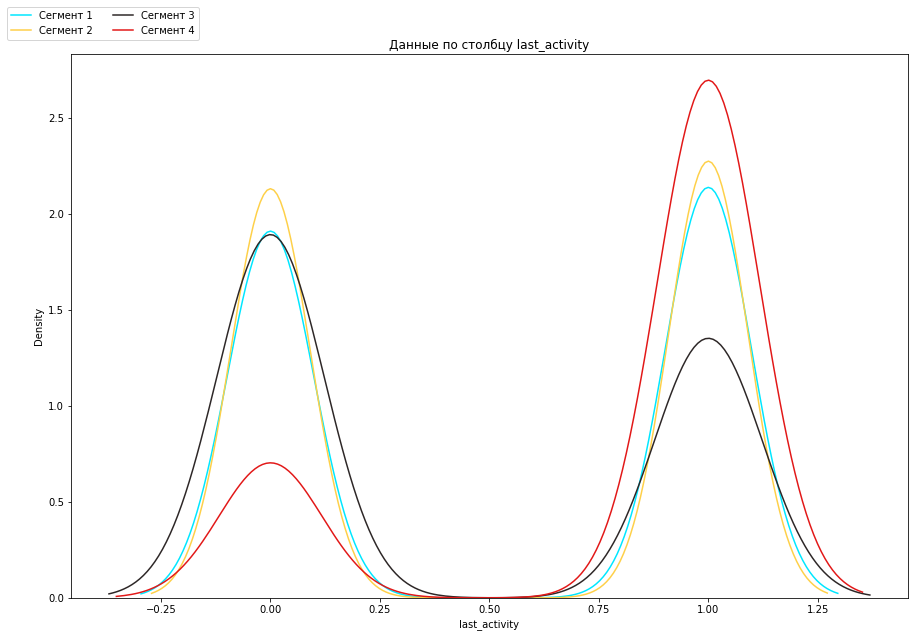

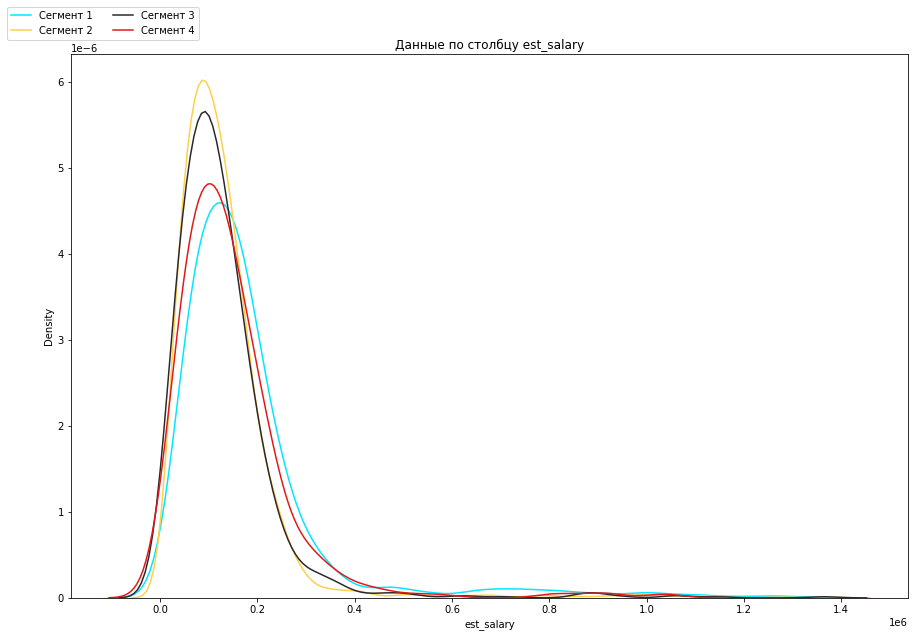

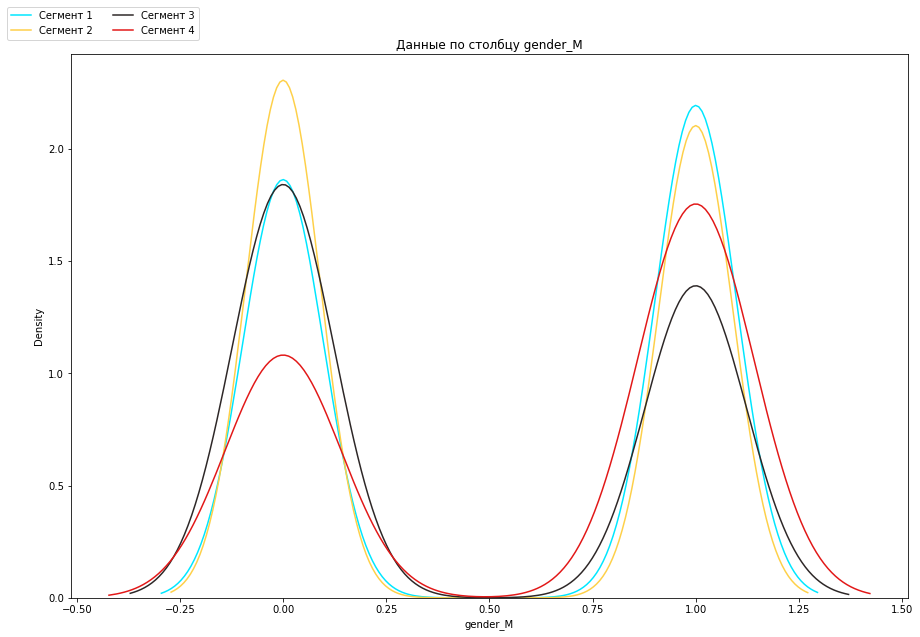

In [30]:
for i in data.drop(['churn', 'user_id', 'products', 'segments', 'city', 'age_range'], axis=1).columns.tolist():
    churn1 = data[data['segments'] == 1][i]
    churn2 = data[data['segments'] == 2][i]
    churn3 = data[data['segments'] == 3][i]
    churn4 = data[data['segments'] == 4][i]
    
    
    fig = plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    sns.distplot(churn1 , color="#00E7FF", label='Сегмент 1', hist=False)
    sns.distplot(churn2 , color="#FED049", label='Сегмент 2', hist=False)
    sns.distplot(churn3 , color="#2D2727", label='Сегмент 3', hist=False)
    sns.distplot(churn4 , color="#E21818", label='Сегмент 4', hist=False)
    fig.legend(bbox_to_anchor=(0.066, 0.9), loc='lower left', ncol=2, borderaxespad=0.)
    ax.set_title('Данные по столбцу ' + i)
    plt.show()

In [31]:
data1 = data.groupby(['segments','gender_М', 'age_range'] ).agg({'balance' : 'median',
                                                'est_salary' : 'median',
                                                'score' : 'mean', 
                                                'equity' : 'median',
                                                'age' : 'median',
                                                'credit_card' : 'mean',
                                                'churn' : 'mean',
                                                'user_id' : 'count'})
data1.style.background_gradient(axis=0) 

data1.columns = ['баланс', 'ЗП', 'крю_рейт.', 'недвижимость', 'возраст', '%_наличия_КК',
       '%_оттока', 'кол-во_клиентов']

data1[['баланс', 'ЗП', 'крю_рейт.', 'возраст']] = data1[['баланс', 'ЗП', 'крю_рейт.', 'возраст']].astype('int64')

data1['%_наличия_КК'] = round(data1['%_наличия_КК'] * 100, 2)
data1['%_оттока'] = round(data1['%_оттока'] * 100, 2)


<a name="наиболее_склонных"></a>
**Выделим группы клиентов наиболее склонных к оттоку**

In [32]:
data1[data1['%_оттока'] > 20].style.background_gradient(axis=0)

<a name="наиболее_лояльных"></a>
**Выделим группы наиболее лояльные к банку**

In [33]:
data1[data1['%_оттока'] < 15].style.background_gradient(axis=0)

Можем выделить несколько групп наиболее склонных к оттоку:
- Мужчины в возрасте 25-60 лет с 2 продуктами, отток в пределах 25-28%;
- Мужчины всех возрастов с 3 продуктами, отток составляет 36-40%;
- Мужчины в возрасте 25-39 лет с 4 и более продуктов, отток 61%;
- Женщины в возрасте 25-60 лет с 3 продуктами, отток 24-27%;
- Женщины в возрасте от 25 лет с 4 продуктами, отток 51- 57%;

Также выделим наиболее лояльные группы:
- Женщины всех возрастов с 1 продуктом, отток составляет 4-5%;
- Мужчины всех возрастов с 1 продуктом, отток составляет 7-9%;
- Женщины в возрасте 60 + лет с 2 продуктами, отток составляет 1.6%;
- Женщины в возрасте 60 + лет с 3 продуктами, отток составляет 9.5%;


Остальные группы или слишком малочислены, чтобы их выделять или отток находится в пределах 10 - 18%.

<a name="Проверка_гипотез"></a>
## 4.Проверка гипотез

***Гипотеза 1:*** доход между клиентами, которые ушли и теми, которые остались отличается.

H0: Средний доход между клиентами которые ушли и которые остались не отличается.

H1: Средний доход между клиентами которые ушли и которые остались отличается.

Для проверки возьмём гипотезы воспользуемся критерием Стьюдента.

Проверим выбросы

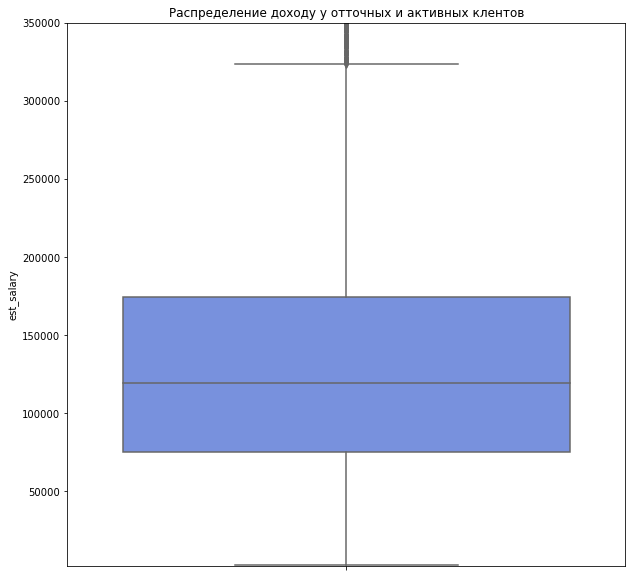

In [34]:
fig = plt.subplots(figsize=(10, 10))

sns.boxplot(y='est_salary', data = data)

plt.ylim(2000, 350000)
plt.title('Распределение доходу у отточных и активных клентов');

Очистим данный от аномалий, нижнию границу возмем немного выше, т.к. з.п. 2-3 тыс. выглядит не реалестично

In [35]:
data_est= data[(data['est_salary'] > 10000) & (data['est_salary'] < 315000)]

print('Наблюдей до удаления:', data.shape[0])
print('Наблюдей до удаления:', data_est.shape[0])
print('Наблюдений потеряно' , data.shape[0] - data_est.shape[0])

Наблюдей до удаления: 9997
Наблюдей до удаления: 9472
Наблюдений потеряно 525


Для проверки, соответствуют ли выборки нормальному распределению применим тест Шапиро-Уилка

In [36]:
sample = data_est[data_est['churn']== 0]['est_salary'] 
sample1 =  data_est[data_est['churn']== 1]['est_salary']

In [37]:
alpha = .05

print(st.shapiro(sample)[1])
print(st.shapiro(sample1)[1])

1.2420895189110137e-38
9.332207995686915e-17


Выборки распределены не нормально, поэтому для проверки гипотезы применим U-критерий Манна-Уитни

In [38]:
alpha = .05

results =  st.mannwhitneyu(sample, sample1,True,'less')

print('p-значение: ', results.pvalue)

if alpha > results.pvalue: 
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print('Средний доход клиентов в оттоке: ' , round(sample1.mean()))
print('Средний доход клиентов не в оттоке: ' , round(sample.mean()))

p-значение:  6.828998749374997e-06
Отвергаем нулевую гипотезу: разница статистически значима
Средний доход клиентов в оттоке:  128376
Средний доход клиентов не в оттоке:  121947


***Гипотеза 2:*** Различие среднего возраста у клиентов в оттоке / не в оттоке

H0: средний возраст клиентов, ушедших в отток не отличается от среднего возраста клиентов не в оттоке

H1: средний возраст клиентов, ушедших в отток отличается от среднего возраста клиентов не в оттоке

Проверим выбросы

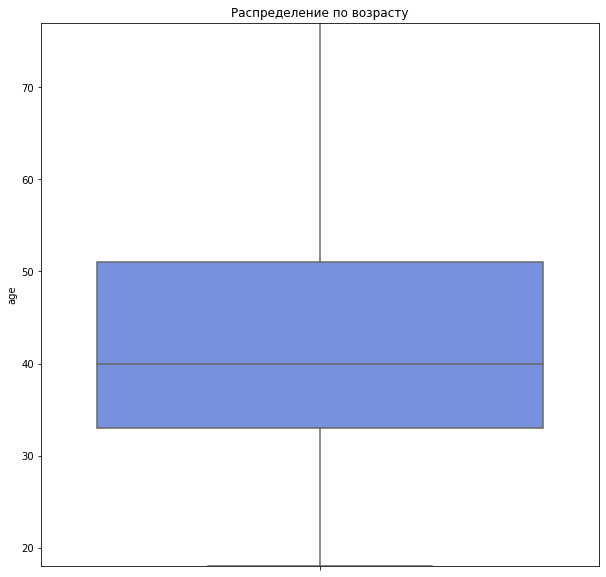

In [39]:
fig = plt.subplots(figsize=(10, 10))

sns.boxplot(y='age', data = data)
plt.ylim(18, 77)
plt.title('Распределение по возрасту');

In [40]:
data_age= data[data['age'] < 77]


print('Наблюдей до удаления:', data.shape[0])
print('Наблюдей до удаления:', data_age.shape[0])
print('Наблюдений потеряно' , data.shape[0] - data_age.shape[0])

Наблюдей до удаления: 9997
Наблюдей до удаления: 9936
Наблюдений потеряно 61


Для проверки, соответствуют ли выборки нормальному распределению применим тест Шапиро-Уилка

In [41]:
sample = data_age[data_age['churn']== 0]['age']
sample1 =  data_age[data_age['churn']== 1]['age']

In [42]:
alpha = .05

print(st.shapiro(sample)[1])
print(st.shapiro(sample1)[1])

3.363116314379561e-43
6.46479794868124e-24


Выборки распределены не нормально, поэтому для проверки гипотезы применим U-критерий Манна-Уитни

In [43]:
alpha = .05

results =  st.mannwhitneyu(sample, sample1)

print('p-значение: ', results.pvalue)

if alpha > results.pvalue: #
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

print('Средний возраст клиентов в оттоке: ' , round(sample1.mean()))
print('Средний возраст клиентов не в оттоке: ' , round(sample.mean()))

p-значение:  1.2932561156986456e-05
Отвергаем нулевую гипотезу: разница статистически значима
Средний возраст клиентов в оттоке:  41
Средний возраст клиентов не в оттоке:  43


Ссылка на [презентацию](https://docs.google.com/presentation/d/e/2PACX-1vSU5RVV56YTVED1YcETIAsQ0gdcC2xy-yVXSe-TW4HZtKdp_VNy22jBM_dQJq5mCBxX3-GnNbwPQAAG/pub?start=false&loop=false&delayms=15000)
<a name="Вывод"></a>
## 5.Вывод

В исследование учавствовали 10 000 уникальных клиентах банка, проживающих в Ярославле, Рыбинске, Ростове. 

***Общий портрет клиента:***
- женщины и мужчины в соотношении 50/50;
- возраст варьируется от 18 до 86. Средний возраст у женщин 43, у мужщин 38;
- Большая часть клиентов из Ярославля - 59%, оставшаяся часть проживает в Рыбинске и Ростове - 26,6% и 14%,3 соответственно;
- 50% клиентов пользуются 2-мя продуктами, 33% 3-мя;
- у 68% клиентов есть кредитная карта;
- в среднем клиенты хранят на счетах сумму в районе 500 тыс. руб.;
- средняя заработная плата составляет 119553.34 р.;
- 52% клиентов активны;
- 18.2% от общего числа закрывают счет.


***Зачастую более склонны к оттоку клиенты:***
- клиенты в возрасте;
- с кол-вом обьектов недвижимости 3 и более;
- с числом продуктов 3 и более;
- активные клиенты (возможно, если клиент обращается в банк для закрытия счета - это учитывается как активность);
- мужского пола.

***Можем выделить портрет клиента с наиболее высоким шансом к оттоку:***
- мужчины в возрасте 25-60 лет с 2 продуктами, отток в пределах 25-28%;
- мужчины всех возрастов с 3 продуктами, отток составляет 36-40%;
- мужчины в возрасте 25-39 лет с 4 и более продуктами, отток 61%;
- женчины в возрасте 25-60 лет с 3 продуктами, отток 24-27%;
- женчины в возрасте от 25 лет с 4 продуктами, отток 51- 57%.

***Также выделим наиболее лояльные группы:***

- женщины всех возрастов с 1 продуктом, отток составляет 4-5%;
- мужчины всех возрастов с 1 продуктом, отток составляет 7-9%;
- женщины в возрасте 60 + лет с 2 продуктами, отток составляет 1.6%;
- женщины в возрасте 60 + лет с 3 продуктами, отток составляет 9.5


***Рекомендации.***
1. Первостепенно необходимо выяснить причину, по которой у клиентов с числом продуктов 3 и более вероятность оттока заметно выше, чем у клиентов с 1 или 2 продуктами. Есть вероятность, что банк предлагает финансово сложный продукт, что вызывает крайний негатив, чтобы точно понять причину, на текущий момент, недостаточно  данных.
2. 70% клиентов из оттока были активным до их ухода. Ситуация аналогичная, понять, что за активность - возможного клиента к уходу побудил неудачный опыт использования продукта банка.
3. Клиентов в возрасте 18 - 25 всего 1.5 % от общего числа, это может быть точкой роста, в качестве мотива к открытию можно реализовать:
- выпуск карт с молодежным дизайном;
- бесплатное обслуживание;
- акции с повышенным кешбеком;

4. В банке нет клиентов младше 18 лет, в качестве мотивации можно предложить детские карты, доп. карты к счетам родителей.
5. Можно также обратить внимание на возрастную группу 'от 60' как вариант предложить пенсионную карту.
